In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_rf = pd.read_csv("df_alpine_tfidf.csv")

In [3]:
df_rf.columns.to_list()

['index',
 'tfidf_0',
 'tfidf_1',
 'tfidf_2',
 'tfidf_3',
 'tfidf_4',
 'tfidf_5',
 'tfidf_6',
 'tfidf_7',
 'tfidf_8',
 'tfidf_9',
 'tfidf_10',
 'tfidf_11',
 'tfidf_12',
 'tfidf_13',
 'tfidf_14',
 'tfidf_15',
 'tfidf_16',
 'tfidf_17',
 'tfidf_18',
 'tfidf_19',
 'tfidf_20',
 'tfidf_21',
 'tfidf_22',
 'tfidf_23',
 'tfidf_24',
 'tfidf_25',
 'tfidf_26',
 'tfidf_27',
 'tfidf_28',
 'tfidf_29',
 'tfidf_30',
 'tfidf_31',
 'tfidf_32',
 'tfidf_33',
 'tfidf_34',
 'tfidf_35',
 'tfidf_36',
 'tfidf_37',
 'tfidf_38',
 'tfidf_39',
 'tfidf_40',
 'tfidf_41',
 'tfidf_42',
 'tfidf_43',
 'tfidf_44',
 'tfidf_45',
 'tfidf_46',
 'tfidf_47',
 'tfidf_48',
 'tfidf_49',
 'tfidf_50',
 'tfidf_51',
 'tfidf_52',
 'tfidf_53',
 'tfidf_54',
 'tfidf_55',
 'tfidf_56',
 'tfidf_57',
 'tfidf_58',
 'tfidf_59',
 'tfidf_60',
 'tfidf_61',
 'tfidf_62',
 'tfidf_63',
 'tfidf_64',
 'tfidf_65',
 'tfidf_66',
 'tfidf_67',
 'tfidf_68',
 'tfidf_69',
 'tfidf_70',
 'tfidf_71',
 'tfidf_72',
 'tfidf_73',
 'tfidf_74',
 'tfidf_75',
 'tfidf_76',

Splitting dependent and independent variables

In [4]:
X = df_rf.drop(['index', 'X..Alpha-Pinene'], axis = 1)
y = df_rf[['X..Alpha-Pinene']]

Plotting histograms on target variable

In [5]:
y_array = y.to_numpy()
y_array

array([[0.10695187],
       [0.10695187],
       [0.10695187],
       ...,
       [0.02139037],
       [0.02139037],
       [0.02139037]])

<Axes: ylabel='Count'>

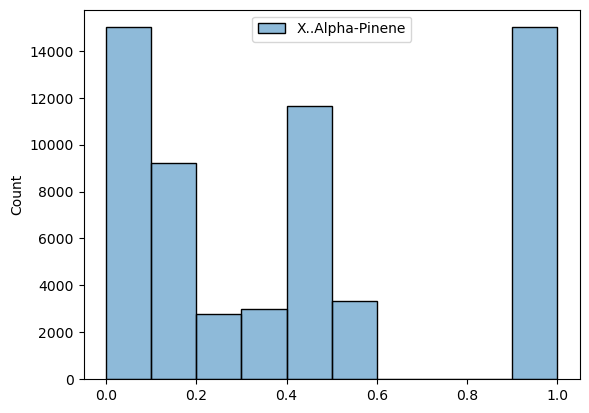

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

RF modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
rfreg = RandomForestRegressor()
rfreg.fit(X_train1, y_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_85342/350139188.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


RandomForestRegressor()

In [10]:
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [11]:
mean_absolute_error(y_val, y_pred_rfreg)

0.025985433811447127

In [12]:
mean_squared_error(y_val, y_pred_rfreg)

0.004157339748803121

In [13]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.06447743596641481

In [14]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9904002441055253

In [15]:
#val
r2_score(y_val, y_pred_rfreg)

0.9691105142548053

Residual plots for each target variable

Feature Selection

In [16]:
df_feat = pd.DataFrame({
    "features": X_train1.columns,
    "score": rfreg.feature_importances_
})

In [17]:
df_feat

,features,score
0,tfidf_0,0.000465
1,tfidf_1,0.001650
2,tfidf_2,0.000086
3,tfidf_3,0.000220
4,tfidf_4,0.000209
...,...,...
464,tree,0.000116
465,tropical,0.000153
466,vanilla,0.000487
467,violet,0.000002


In [18]:
df_feat_ranked = df_feat.sort_values("score", ascending=False)

In [19]:
pd.set_option('display.max_rows', df_feat_ranked.shape[0]+1)
df_feat_ranked

,features,score
389,indica,3.624423e-01
443,mango,9.597552e-02
141,tfidf_141,3.037551e-02
426,blueberry,3.014558e-02
434,earthy,2.659452e-02
253,tfidf_253,1.823066e-02
168,tfidf_168,1.765265e-02
345,tfidf_345,1.738846e-02
210,tfidf_210,1.465557e-02
285,tfidf_285,1.259075e-02


In [20]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [21]:
selector.estimator_.feature_importances_

array([5.91754582e-04, 1.72533519e-03, 7.31549083e-05, 3.66680975e-04,
       2.07867204e-04, 9.54798606e-04, 9.57826776e-05, 3.91864106e-03,
       1.58112150e-05, 1.03120522e-04, 7.14032274e-05, 1.73923789e-03,
       3.82078350e-05, 6.76459987e-05, 1.44370624e-04, 8.11853796e-04,
       2.22281876e-04, 1.65014759e-04, 7.40757751e-04, 2.58960675e-04,
       7.27204415e-04, 3.66578422e-03, 3.64353148e-04, 2.82838257e-03,
       1.23792960e-04, 3.81033474e-05, 1.84862969e-04, 7.58924019e-05,
       2.20748443e-04, 4.50155053e-05, 1.26326229e-02, 8.00661003e-05,
       2.46281778e-04, 4.85778117e-05, 4.68735105e-04, 7.32691012e-05,
       7.88038145e-05, 1.25892686e-03, 4.63037921e-05, 1.99971115e-04,
       8.40320265e-05, 1.47495297e-04, 9.75079039e-06, 9.79164484e-03,
       2.02037892e-04, 8.37166698e-05, 2.71226623e-03, 4.95602360e-05,
       3.17129457e-04, 1.13953444e-04, 1.31581056e-04, 1.83058735e-05,
       6.65561454e-04, 7.46274228e-05, 1.84849806e-03, 2.43373317e-04,
      

In [22]:
selector.threshold_

0.0021321961620469083

In [23]:
mask = selector.get_support()

In [24]:
mask

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False,

In [25]:
selected_features = X.columns[mask]

In [26]:
selected_X = df_rf[selected_features]
selected_X

,tfidf_7,tfidf_21,tfidf_23,tfidf_30,tfidf_43,tfidf_46,tfidf_78,tfidf_82,tfidf_93,tfidf_97,...,euphoric,focused,giggly,hungry,relaxed,talkative,blueberry,diesel,earthy,mango
0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.152565,0.0,0.000000,0.0,...,1,0,0,1,1,0,0,0,0,0
1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.152565,0.0,0.000000,0.0,...,1,0,0,1,1,0,0,0,0,0
2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.253181,0.0,...,1,1,0,0,1,0,0,0,0,0
3,0.0,0.000000,0.0,0.0,0.198545,0.0,0.204993,0.0,0.000000,0.0,...,1,1,0,1,0,0,0,0,0,0
4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.000000,0.0,0.0,0.000000,0.0,0.312348,0.0,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,0
59996,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.108601,0.0,...,0,0,0,0,0,0,0,0,0,0
59997,0.0,0.349629,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,0
59998,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0


Train test split (after Feature Selection)

In [27]:
import joblib

joblib.dump(selector, "selector_rf_tfidf_alpine.pkl")
joblib.dump(selected_X, "selected_X_rf_tfidf_alpine.pkl")

['selected_X_rf_tfidf_alpine.pkl']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [29]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [30]:
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_85342/3758305.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [31]:
mean_absolute_error(y_val, y_pred_rfreg)

0.028258370633502897

In [32]:
mean_squared_error(y_val, y_pred_rfreg)

0.004692621490617391

In [33]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.06850271155667774

In [34]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9814439518093024

In [35]:
#val
r2_score(y_val, y_pred_rfreg)

0.9650050595312505

Hyperparameter Tuning

In [36]:
parameters = {'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [37]:
rscv = RandomizedSearchCV(rfreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs = -1)

In [38]:
rscv.fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [39]:
rscv.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 100}

In [40]:
joblib.dump(rscv, "rscv_rf_tfidf_alpine.pkl")
joblib.dump(rscv.best_params_, "rscv_rf_tfidf_best_params_alpine.pkl")

['rscv_rf_tfidf_best_params_alpine.pkl']

RF (after Hyperparameter Tuning)

In [41]:
rfreg_ht = RandomForestRegressor(n_estimators = 500, min_samples_split = 2, min_samples_leaf = 2, max_features = 'auto', max_depth = 100)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg = rfreg_ht.predict(X_val)
y_pred_rfreg_r2 = rfreg_ht.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_85342/50916421.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [42]:
mean_absolute_error(y_val, y_pred_rfreg)

0.031027618938232665

In [43]:
mean_squared_error(y_val, y_pred_rfreg)

0.005003016622067619

In [44]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.0707320056414889

In [45]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9775785478295905

In [46]:
#val
r2_score(y_val, y_pred_rfreg)

0.9626903066434224

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [47]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [48]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_tfidf_alpine.pkl")
joblib.dump(y_test, "y_test_rfreg_tfidf_alpine.pkl")

['y_test_rfreg_tfidf_alpine.pkl']

In [49]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.031099194426256065

In [50]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.004755934572407881

In [51]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.06896328423449598

In [52]:
r2_score(y_test, y_pred_rfreg_test)

0.9644312315311866

Error analysis

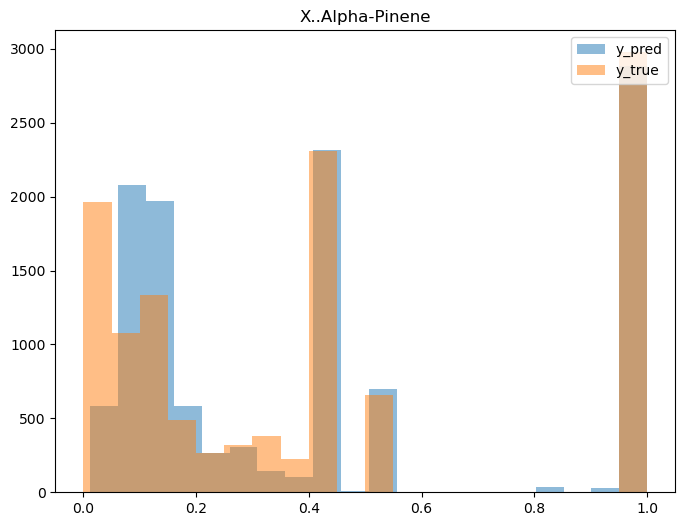

<Figure size 640x480 with 0 Axes>

In [53]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Alpha-Pinene"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_alpine.png')

Pearson R

In [54]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.982
P-value: 0.000


<Axes: >

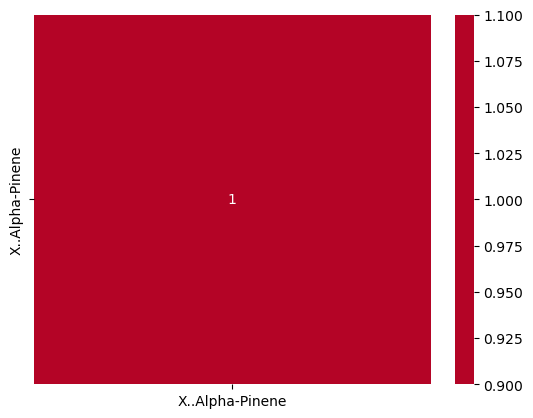

In [55]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)